# All hematopoietic dataset

Hematopoiesis dataset from *Weinreb, C., Rodriguez-Fraticelli, A., Camargo, F. D. & Klein, A. M. Science 367, (2020)*. 

This dataset has 3 time points for both the clonal and state measurements. This dataset has ~50000 cells. Running the whole pipeline for the first time could take 5.2 hours in a standard personal computer.
Most of the time (3.3 h) is used for generating the similarity matrix, which are saved for later usage. It also generates output files that amount to 25G storage.

**Key components:**
    
* Part I: Infer transition map using clones from both day 4 and day 6
    
* Part II: Infer transition map using clones from all time points
    
* Part III: Infer transition map using only clones from the last time point

In [1]:
import sys
new_path="/Users/shouwenwang/Dropbox (HMS)/Python_file/Clonal_tracing/cell_lineage_tracing/code_for_clonal_dynamics/Python/WOT/CoSpar_Package_development/CoSpar/"
sys.path.append(new_path)

import cospar as cs
import numpy as np

In [78]:
cs.logging.print_version()
cs.settings.verbosity=2
cs.settings.data_path='LARRY_data' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='LARRY_figure' # A relative path to save figures. If not existed before, create a new one.
cs.settings.set_figure_params(format='png',figsize=[4,3.5],dpi=75,fontsize=14,pointsize=2) 

Running cospar 0.0.11 (python 3.6.12) on 2021-04-14 12:28.


In [79]:
# # set the directory for figures and data. If not existed yet, they will be created automtaically.
# cs.settings.data_path='data_cospar' 
# cs.settings.figure_path='fig_cospar' 
# adata_orig=cs.datasets.hematopoiesis_subsampled()
# adata_orig.uns['data_des']=['blood']

## Loading data

In [80]:
adata_orig=cs.datasets.hematopoiesis_all()

In [81]:
adata_orig

AnnData object with n_obs × n_vars = 49116 × 25289
    obs: 'time_info', 'state_info'
    uns: 'clonal_time_points', 'data_des', 'state_info_colors'
    obsm: 'X_clone', 'X_emb', 'X_pca'

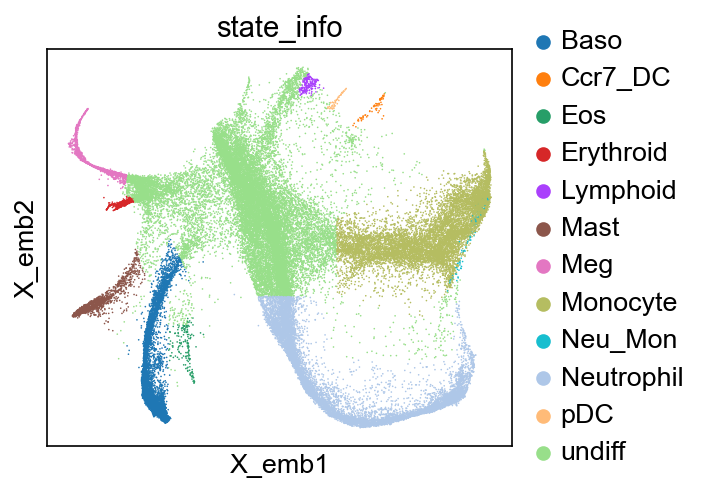

<Figure size 300x262.5 with 0 Axes>

In [82]:
cs.pl.embedding(adata_orig,color='state_info')

In [7]:
cs.hf.check_available_choices(adata_orig)

Current time ordering from simple sorting: ['2' '4' '6']
Available transition maps: []
Available clusters: ['Mast', 'Baso', 'Lymphoid', 'Neu_Mon', 'Erythroid', 'Ccr7_DC', 'pDC', 'Neutrophil', 'undiff', 'Meg', 'Monocyte', 'Eos']
Available time points: ['2' '4' '6']
Clonal time points: ['2' '4' '6']


## Basic clonal analysis

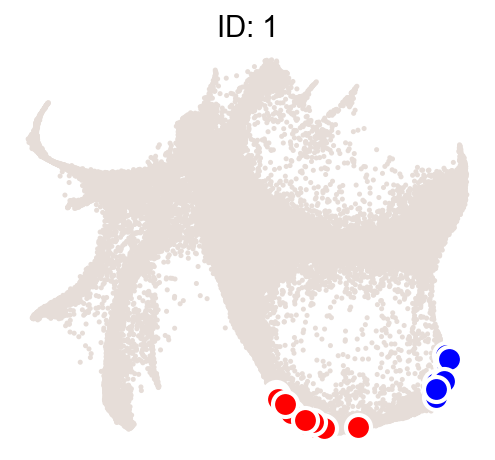

In [8]:
cs.pl.clones_on_manifold(adata_orig,selected_clone_list=[1],color_list=['black','red','blue'])

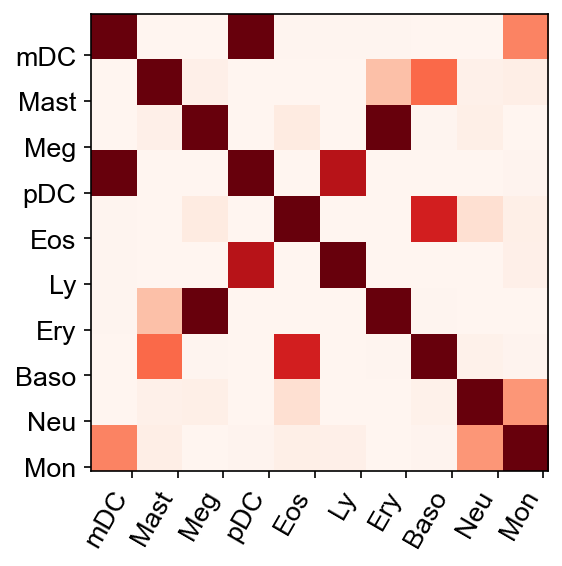

In [9]:
selected_times='4'
selected_fates=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
coupling=cs.pl.fate_coupling_from_clones(adata_orig,selected_times, selected_fates=selected_fates, 
                color_bar=False,rename_fates=celltype_names)

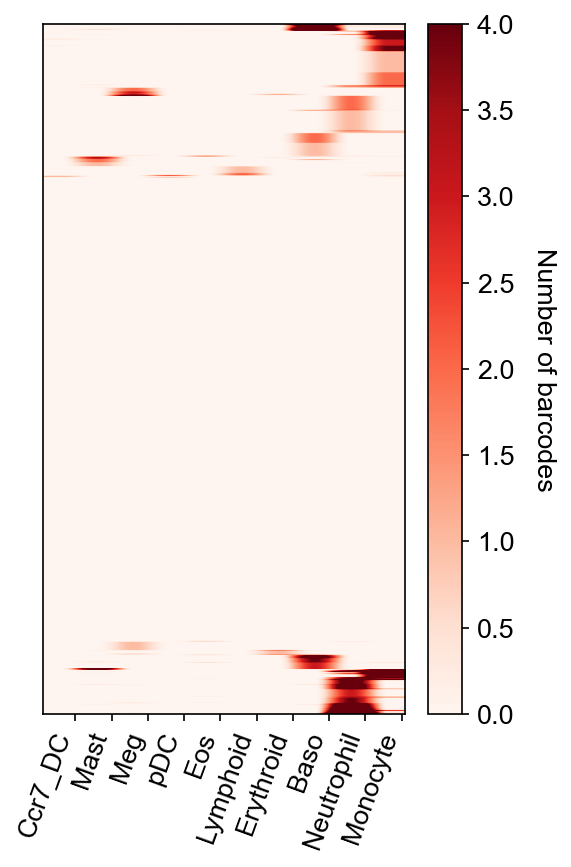

In [10]:
selected_times='4'
cs.pl.barcode_heatmap(adata_orig,selected_times, selected_fates=selected_fates, color_bar=True)

## Part I: Infer transition map from all clonal data

### Map inference

When first run, it takes around 3 h 37 mins, in which 3 h 20 mins are used for computing the similarity matrices and saving these data. It takes only 20 mins for later runs.

In [11]:
adata=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig,clonal_time_points=['2','4','6'],later_time_point='6',
        smooth_array=[20,15,10],sparsity_threshold=0.2,max_iter_N=3)

Trying to set attribute `.uns` of view, copying.


------Compute the full Similarity matrix if necessary------
------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2--------
Step 1: Select time points
Number of multi-time clones post selection: 1216
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.903
--------Current initial time point: 4--------
Step 1: Select time points
Number of multi-time clones post selection: 3047
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.97
-----------Total used time: 843.0632741451263 s ------------


### Save or load pre-computed data (optional)

This can be used to save adata with maps computed from different tools or parameters.
Usually, different parameter choices will result in different `data_des`, a prefix to identify the anndata.
Saving an adata would print the `data_des`, which can be used to load the corresponding adata.

In [12]:
save_data=False
if save_data:
    cs.hf.save_map(adata)
    
load_data=False
if load_data:### Plotting
    # updated Jan 27, 2021
    #data_des='LARRY_TwoTimeClone_t*4*6'### Plotting
    data_des='LARRY_OneTimeClone_t*4*6'
    #data_des='LARRY_TwoTimeClone_t*2*4*6'
    adata=cs.hf.load_saved_adata_with_key(data_des)


### Plotting


#### Transition profiles for single cells

Forward transitions with `map_backward=False`.

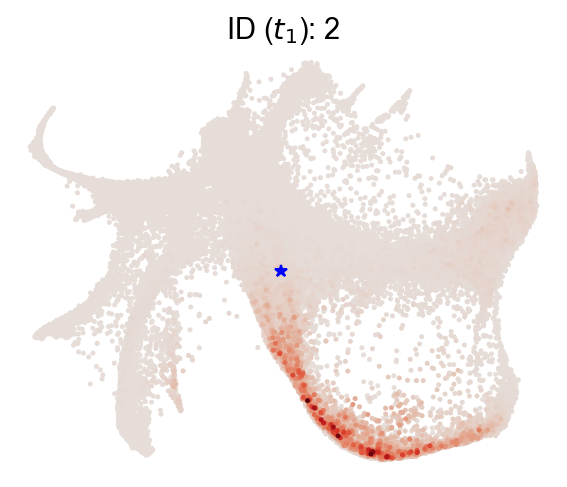

In [13]:
selected_state_id_list=[2]

cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list, color_bar=False,
                                    used_Tmap='transition_map',map_backward=False)

Backward transitions with `map_backward=True`.

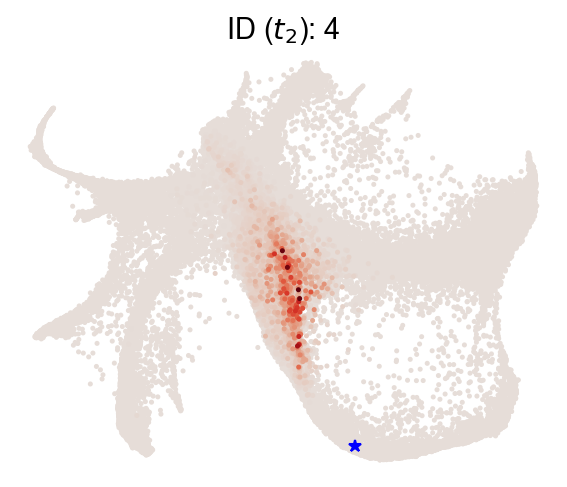

In [14]:
selected_state_id_list=[4]
cs.pl.single_cell_transition(adata,selected_state_id_list=selected_state_id_list, color_bar=False,
                                    used_Tmap='transition_map',map_backward=True)

#### Fate map

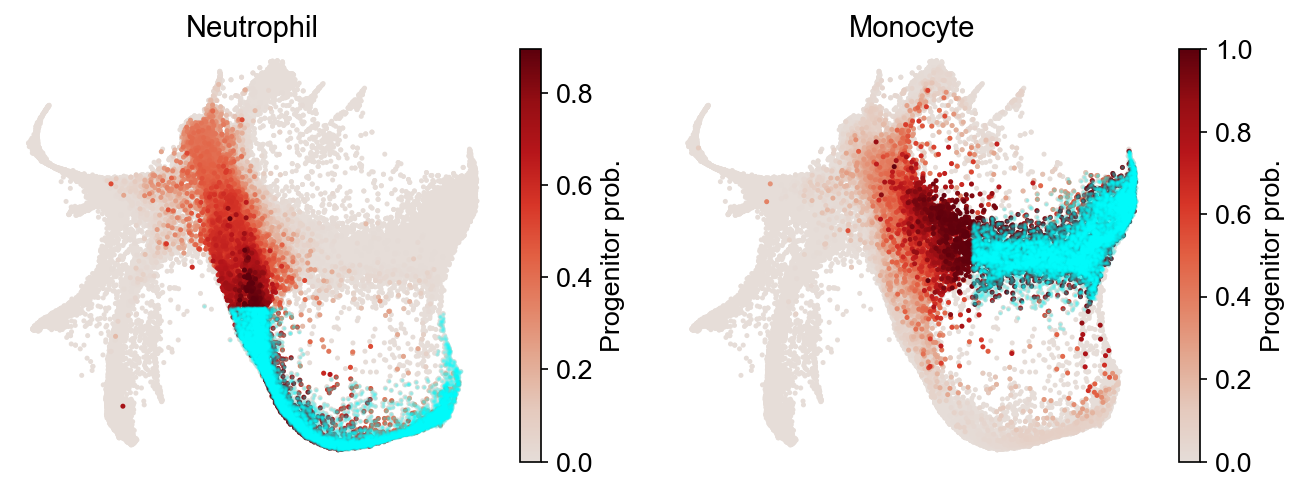

In [16]:
cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],used_Tmap='transition_map',
               map_backward=True,plot_target_state=True,horizontal=True)

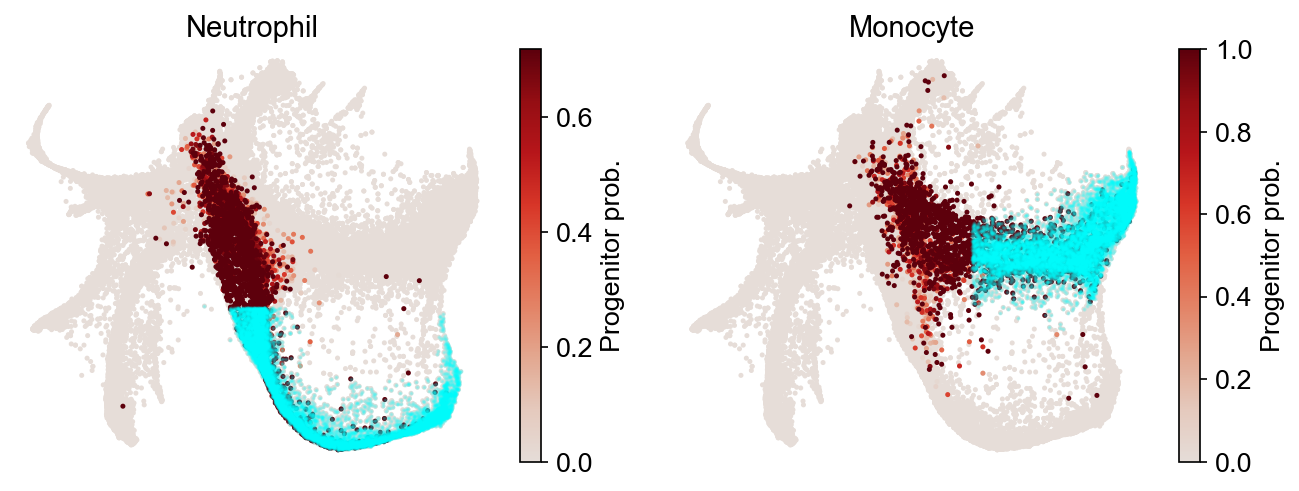

In [17]:
cs.pl.fate_map(adata,selected_fates=['Neutrophil','Monocyte'],used_Tmap='intraclone_transition_map',
               map_backward=True,plot_target_state=True,horizontal=True)

#### Fate bias

In [72]:
cs.pl.fate_bias(adata,selected_fates=['Neutrophil','Monocyte'],used_Tmap='transition_map',
            selected_times=['4'],plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.1)

Error: 4 is not a valid time point.
Error: Do not have valid fates or time points. Computation aborted!


#### Fate coupling of the transition map

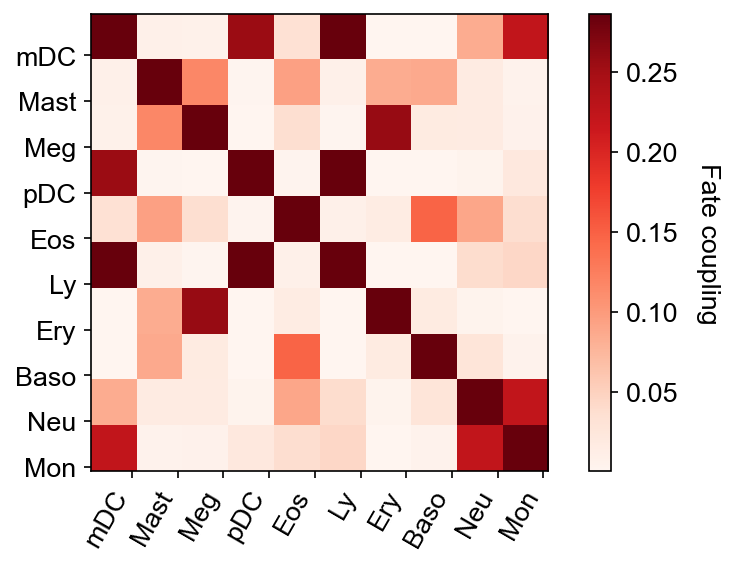

In [19]:
fate_array=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
coupling=cs.pl.fate_coupling_from_Tmap(adata,selected_fates=fate_array,used_Tmap='transition_map',rename_fates=celltype_names)


#### Hierarchy


            /-Ery
         /-|
      /-|   \-Meg
     |  |
   /-|   \-Mast
  |  |
  |  |   /-Baso
  |   \-|
--|      \-Eos
  |
  |      /-Mon
  |   /-|
  |  |   \-Neu
   \-|
     |      /-Ly
     |   /-|
      \-|   \-mDC
        |
         \-pDC


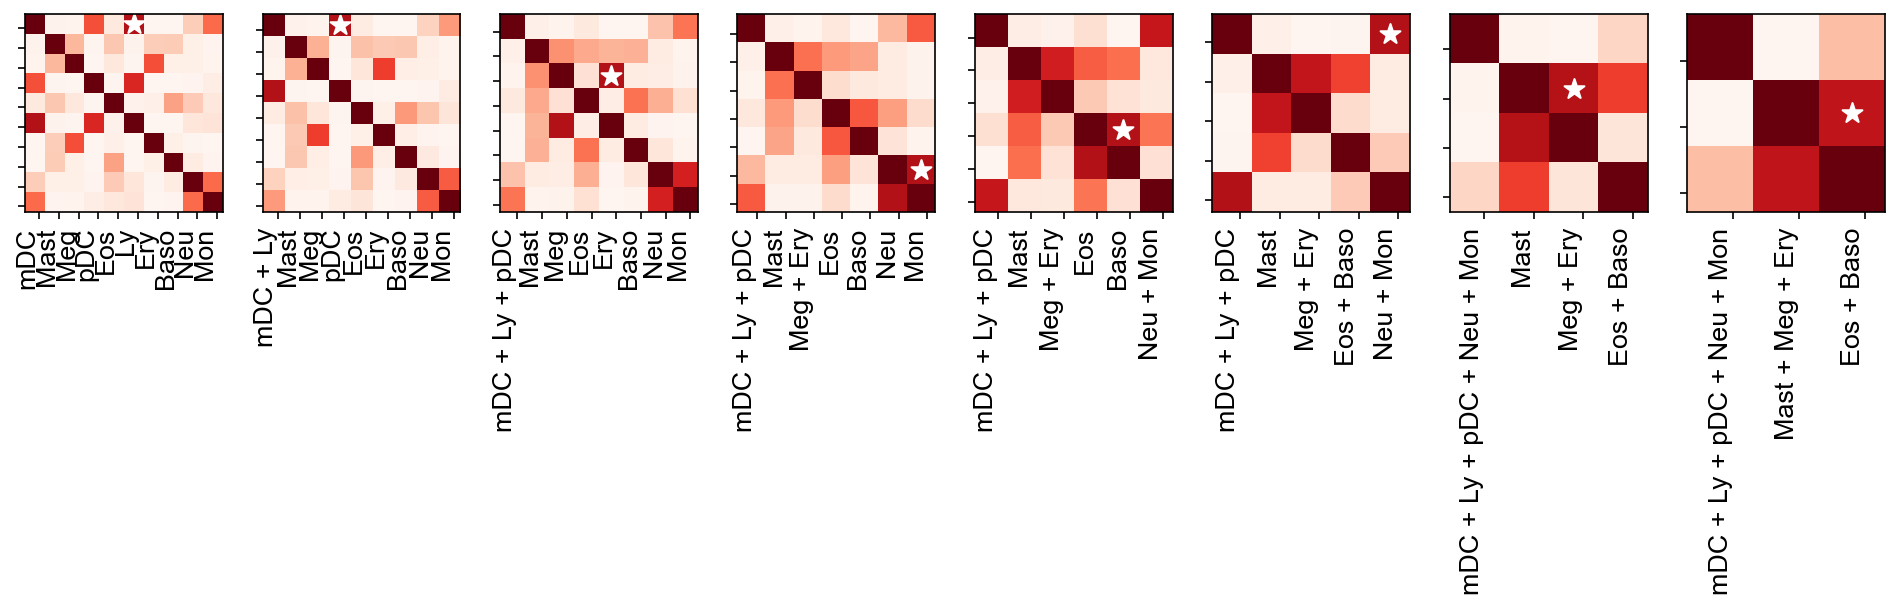

In [20]:
cs.pl.fate_hierarchy_from_Tmap(adata,selected_fates=selected_fates,used_Tmap='transition_map',
                        rename_fates=celltype_names,plot_history=False)

#### Dynamic trajectory inference

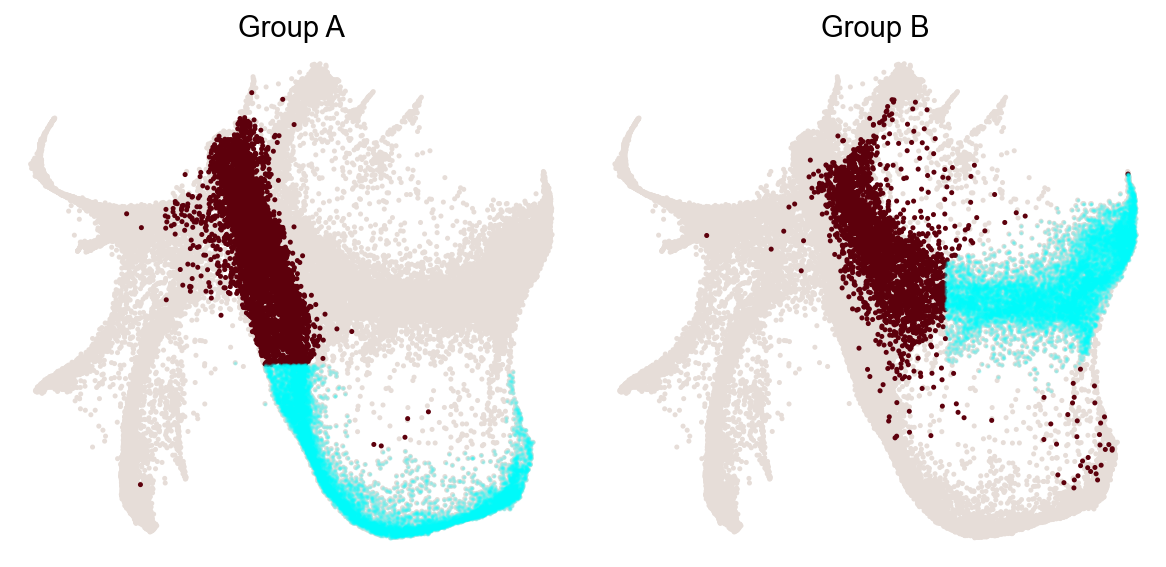

In [21]:
cs.pl.dynamic_trajectory_from_fate_bias(adata, selected_fates=['Neutrophil','Monocyte'], 
 used_Tmap='transition_map', map_backward=True, bias_threshold_A=0.5, bias_threshold_B=0.5, 
                    sum_fate_prob_thresh=0.2, avoid_target_states=True)


#### Gene trend along the dynamic trajectory

The selected states, combined with the target states are stored as dynamic trajectory at `adata.uns['dynamic_trajectory']`.
We can plot gene trend along this trajectory

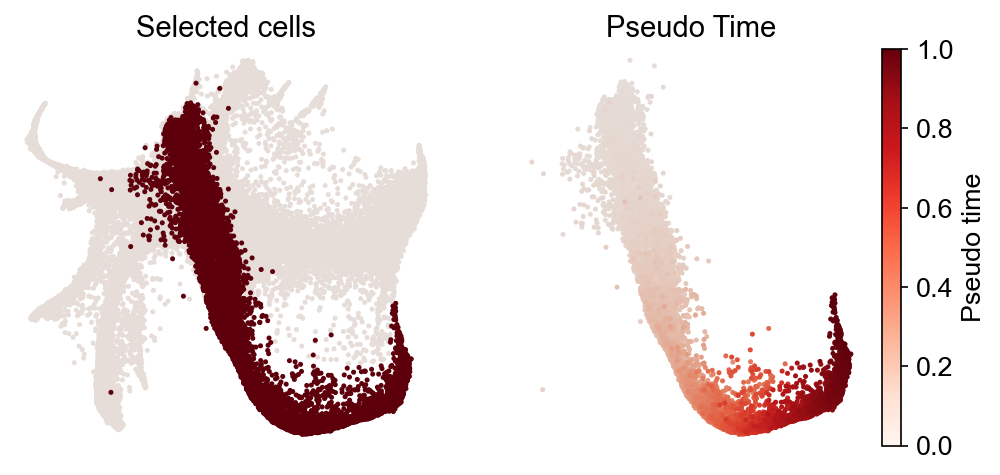

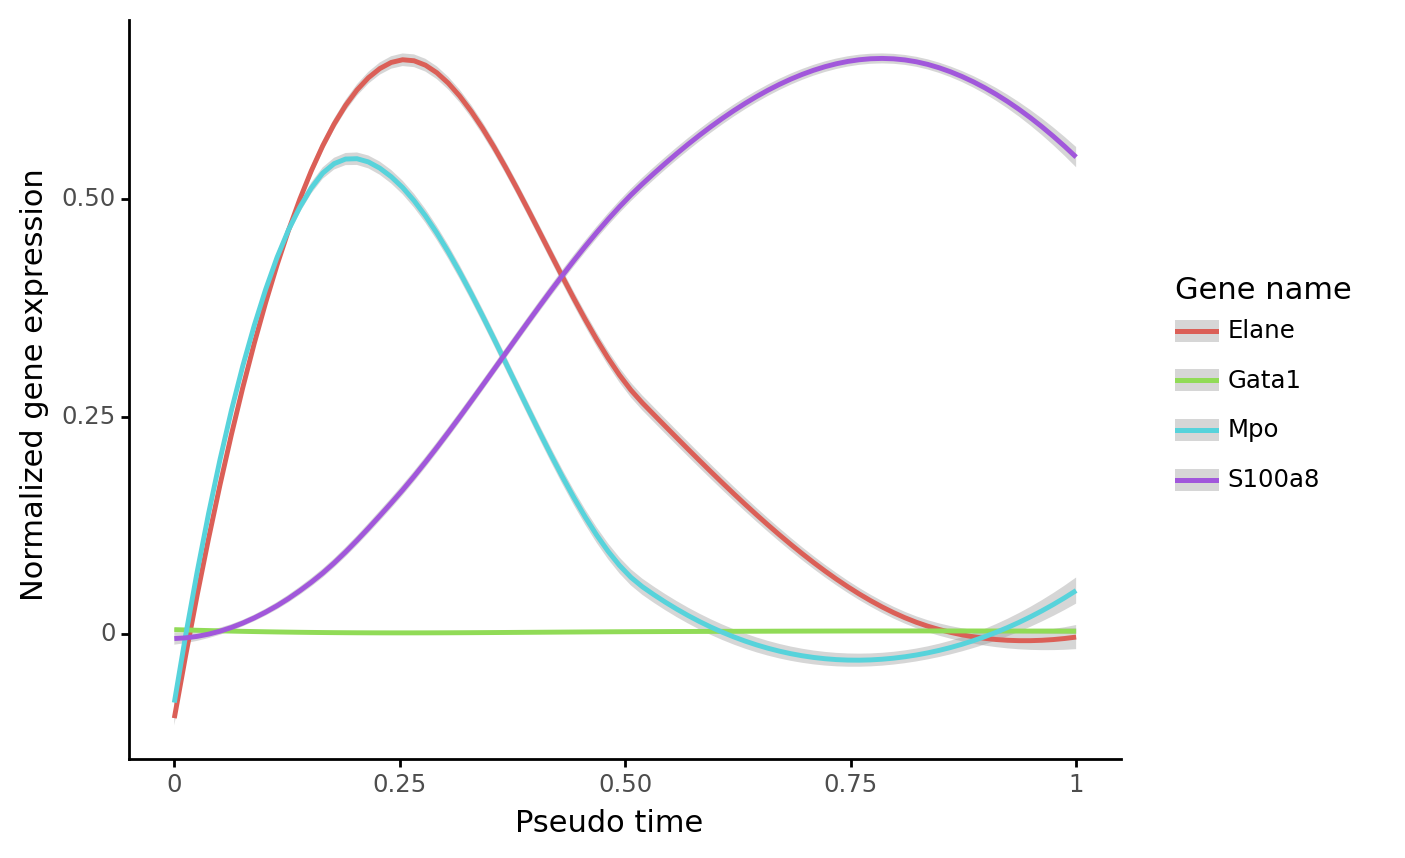

In [23]:
gene_name_list=['Gata1','Mpo', 'Elane', 'S100a8']
selected_fate='Neutrophil'
adata_selected=cs.pl.gene_expression_dynamics(adata,selected_fate,gene_name_list, traj_threshold=0.2,  
      map_backward=True, invert_PseudoTime=False)

## Part II: Infer transition map end-time clones

When run for the firs time, assuming that the similarity matrices are pre-computed, it takes 73 mins. Around 40 mins of which are used to compute the initialized map.

We group time points '2' and '4' so that the inference on day 2 states (which has much fewer cells) are better. 

In [44]:
time_info=np.array(adata_orig.obs['time_info'])
time_info[time_info=='2']='24'
time_info[time_info=='4']='24'
adata_orig.obs['time_info']=time_info
adata_orig=cs.pp.initialize_adata_object(adata_orig)

Time points with clonal info: ['24' '6']


In [45]:
adata_1=cs.tmap.infer_Tmap_from_one_time_clones(adata_orig,initial_time_points=['24'],later_time_point='6',
    initialize_method='OT',OT_cost='GED',smooth_array=[20,15,10],max_iter_N=[1,3],
                    sparsity_threshold=0.2,use_full_Smatrix=True)

Trying to set attribute `.uns` of view, copying.
Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 24--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use OT method for initialization-------
Load pre-computed custom OT matrix
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.974
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.142
Finishing Joint Optimization, used time 918.9067780971527
-----------Total used time: 954.627111196518 s ------------


### Fate bias

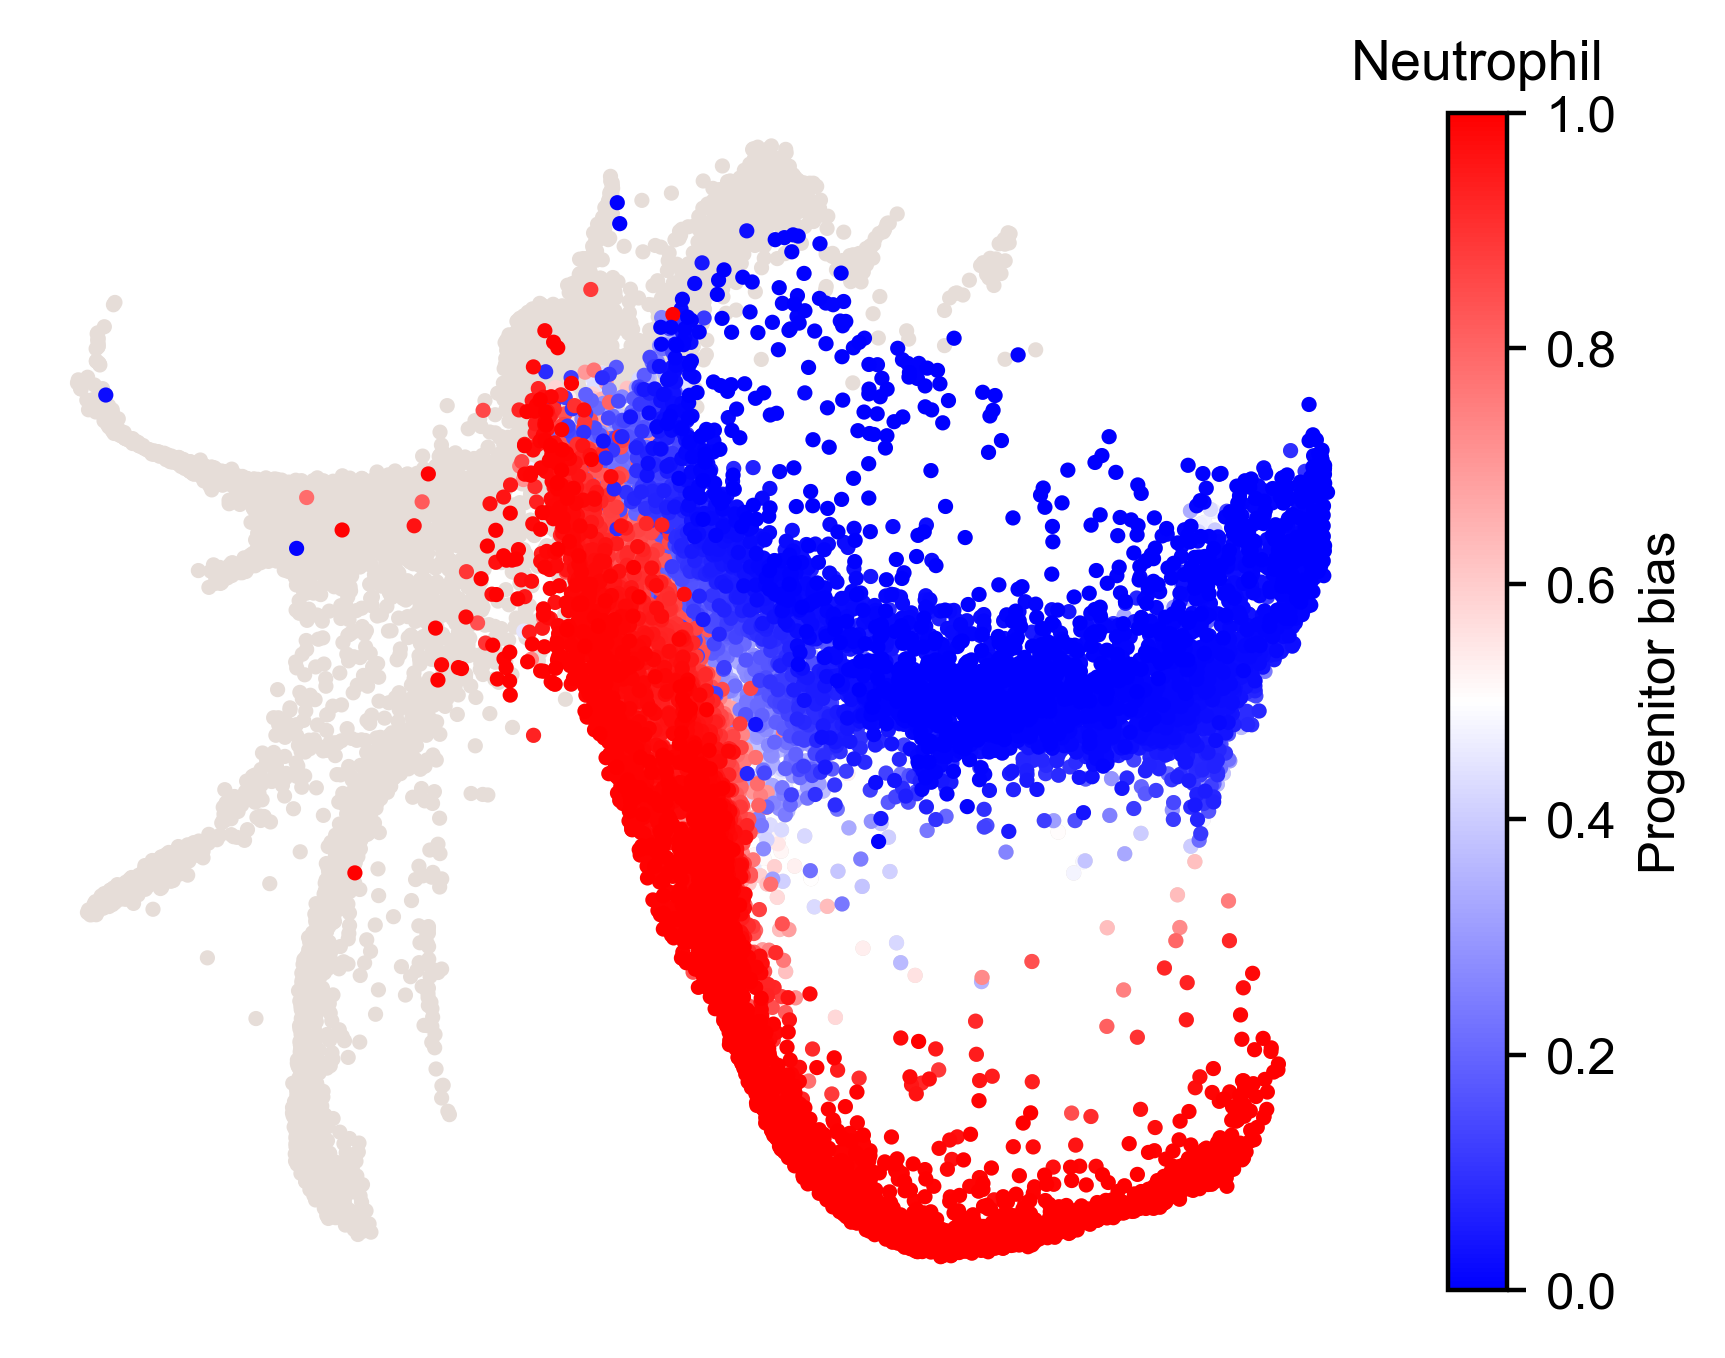

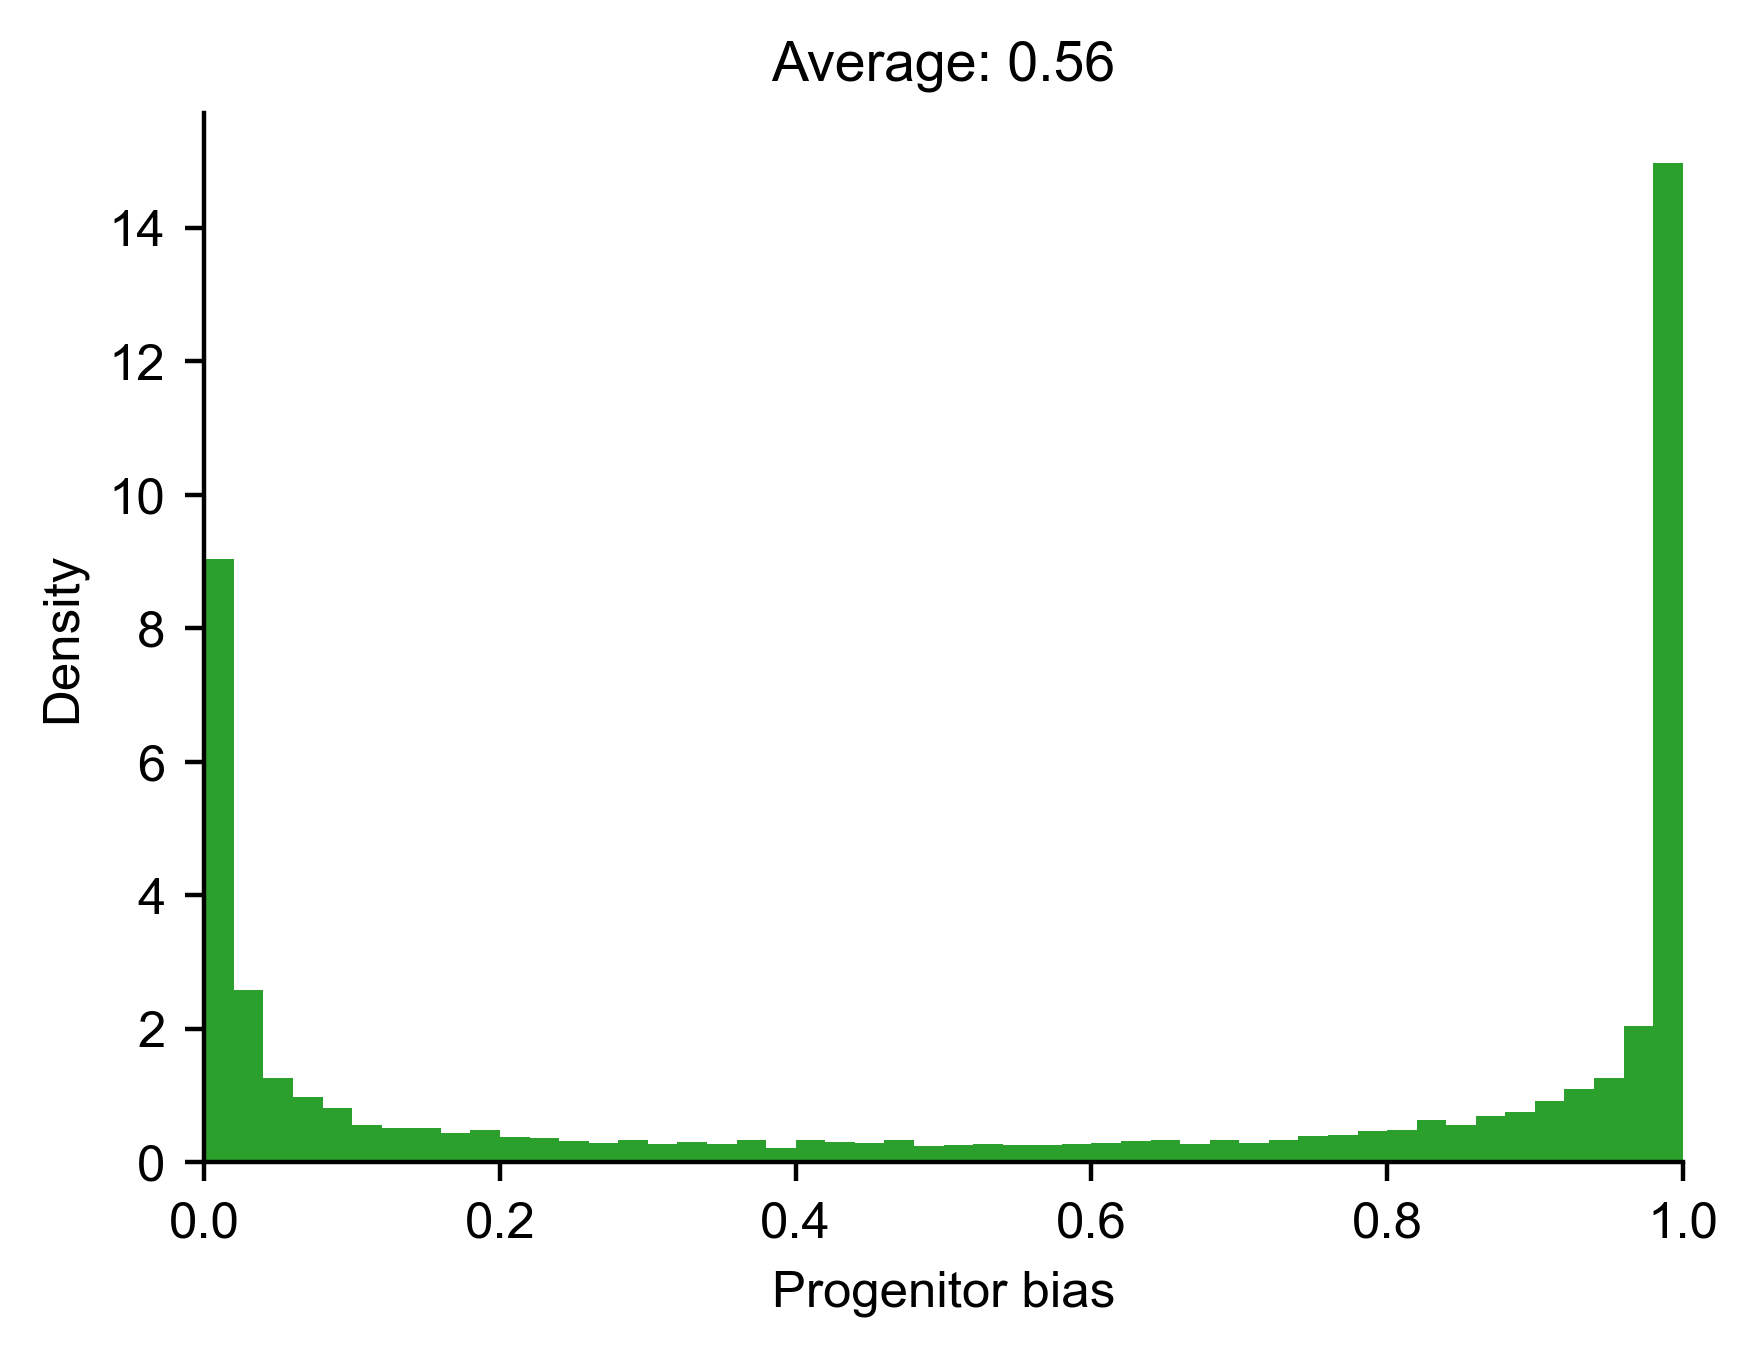

In [73]:
cs.pl.fate_bias(adata_1,selected_fates=['Neutrophil','Monocyte'],used_Tmap='transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.1)

### Fate coupling of the transition map

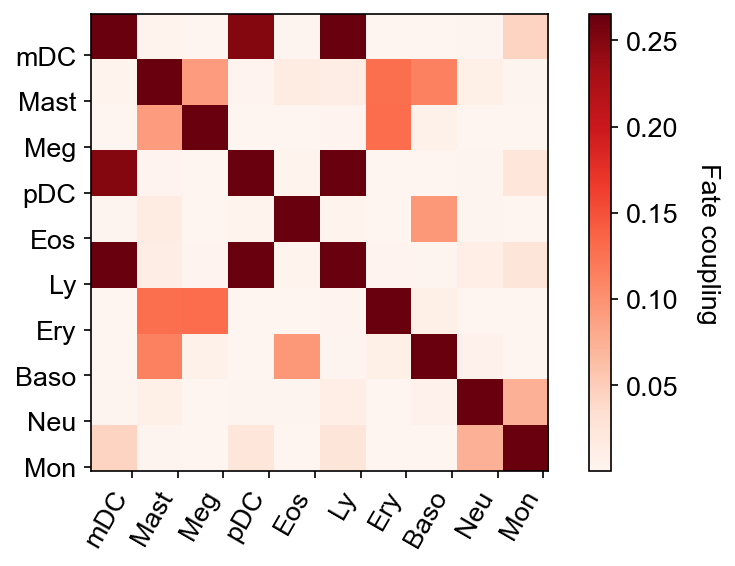

In [47]:
fate_array=['Ccr7_DC','Mast','Meg','pDC','Eos','Lymphoid','Erythroid','Baso',  'Neutrophil', 'Monocyte']
celltype_names=['mDC',  'Mast', 'Meg', 'pDC', 'Eos', 'Ly', 'Ery', 'Baso', 'Neu', 'Mon']
coupling=cs.pl.fate_coupling_from_Tmap(adata_1,selected_fates=fate_array,used_Tmap='transition_map',
                        rename_fates=celltype_names,color_bar=True)


## Part III: Infer transition map state information alone

In [48]:
adata_2=cs.tmap.infer_Tmap_from_state_info_alone(adata_orig,initial_time_points=['24'],later_time_point='6',
    initialize_method='OT',OT_cost='GED',smooth_array=[20,15,10],max_iter_N=[1,3],
                    sparsity_threshold=0.2,use_full_Smatrix=True)

Step I: Generate pseudo clones where each cell has a unique barcode-----


Trying to set attribute `.uns` of view, copying.


Step II: Perform joint optimization-----


Trying to set attribute `.uns` of view, copying.


--------Infer transition map between initial time points and the later time one-------
--------Current initial time point: 24--------
Step 0: Pre-processing and sub-sampling cells-------
Step 1: Use OT method for initialization-------
Load pre-computed custom OT matrix
Step 2: Jointly optimize the transition map and the initial clonal states-------
-----JointOpt Iteration 1: Infer initial clonal structure
-----JointOpt Iteration 1: Update the transition map by CoSpar
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.978
Convergence (JointOpt, iter_N=1): corr(previous_T, current_T)=0.133
Finishing Joint Optimization, used time 1203.4307279586792
-----------Total used time: 1255.7852580547333 s ------------


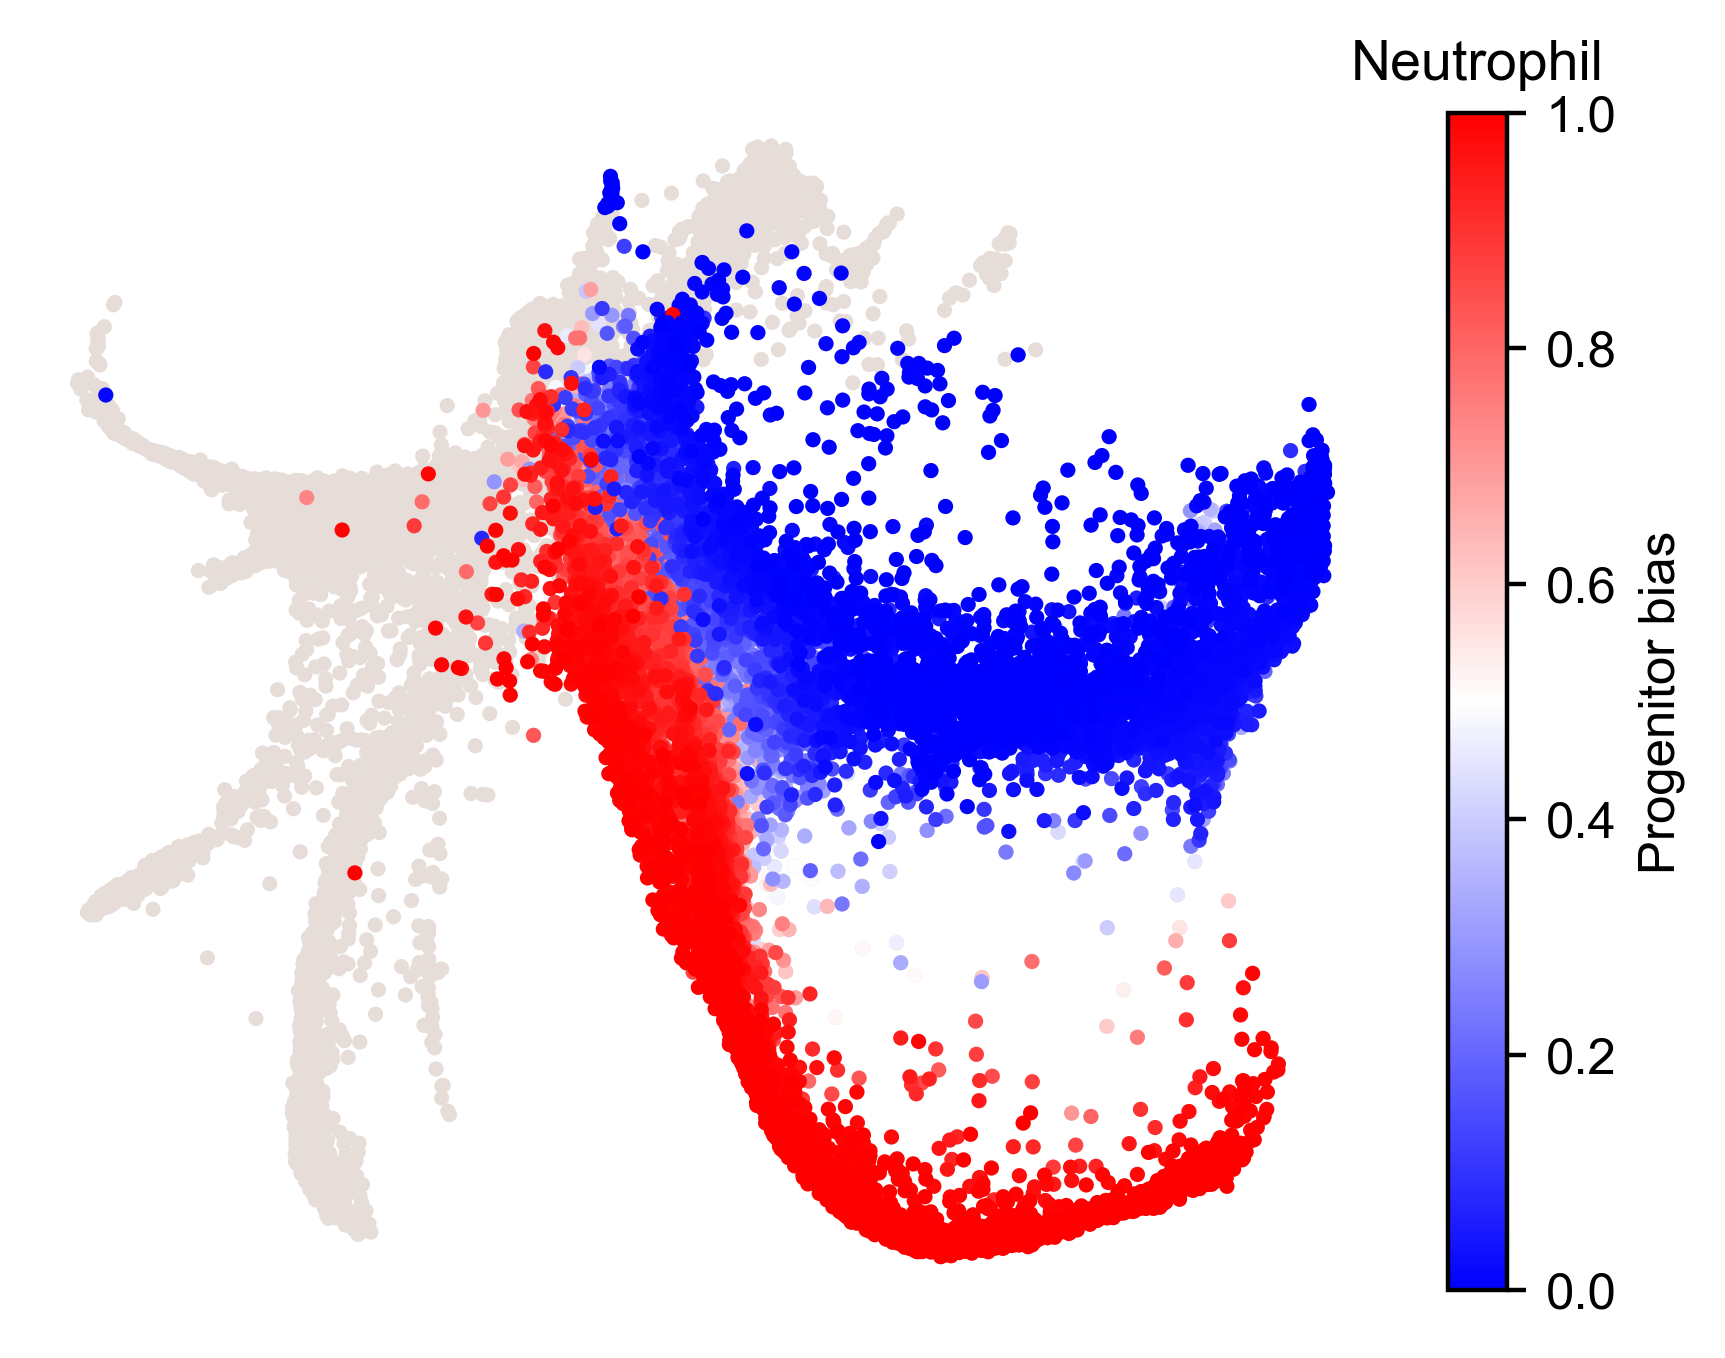

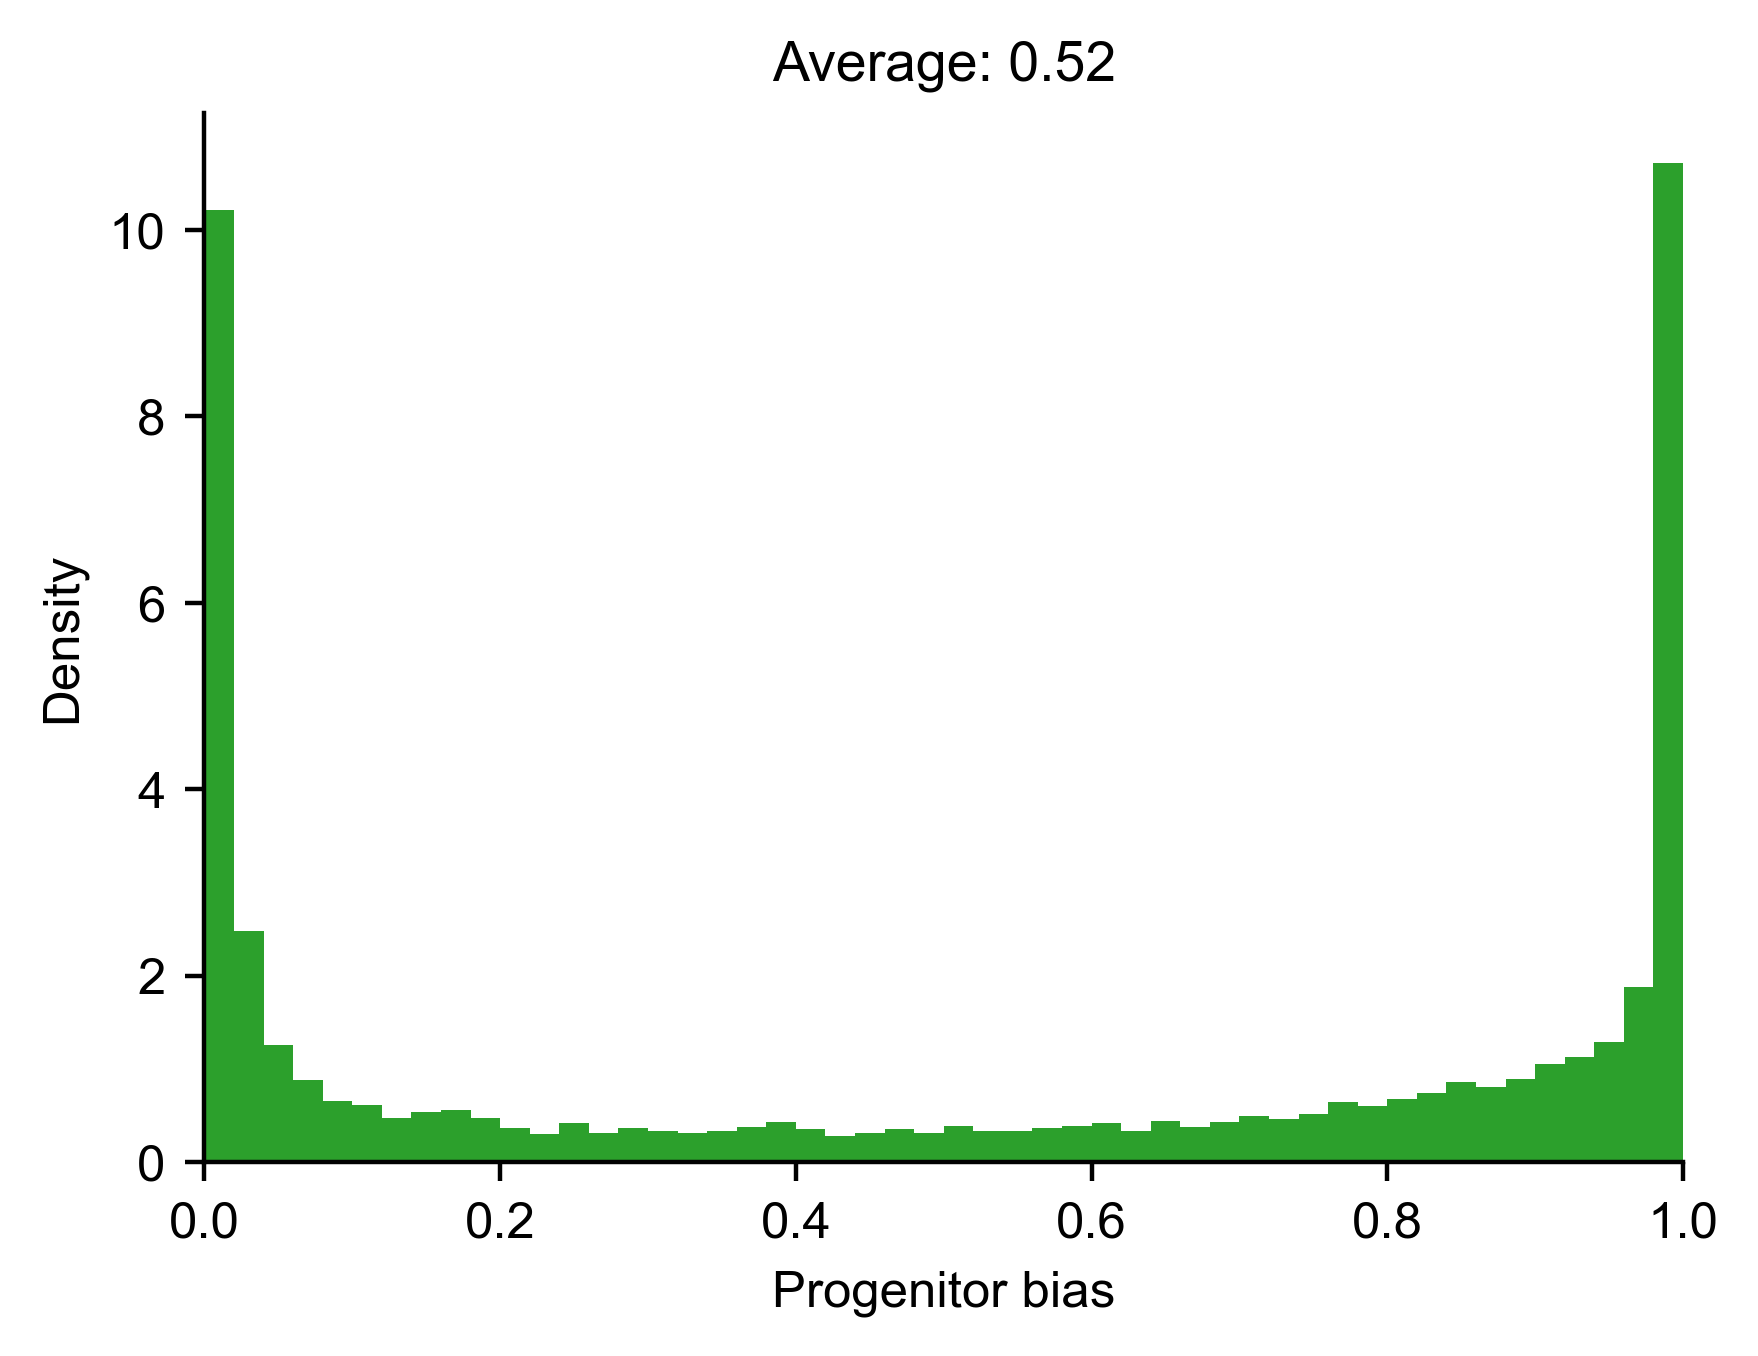

In [74]:
cs.pl.fate_bias(adata_2,selected_fates=['Neutrophil','Monocyte'],used_Tmap='transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.1)

## Part IV: Predict fate bias for Gata1+ states

### Load data

In [50]:
cs.settings.data_path='LARRY_data_Gata1' # A relative path to save data. If not existed before, create a new one.
cs.settings.figure_path='LARRY_figure_Gata1' # A relative path to save figures. If not existed before, create a new one.
adata_orig_1=cs.hf.read(f'{cs.settings.data_path}/LARRY_Gata1_lineage_adata_preprocessed.h5ad')

In [51]:
#adata_orig_1=adata_orig

In [52]:
adata_orig_1=cs.pp.initialize_adata_object(adata_orig_1)

Clones without any cells are removed.
Time points with clonal info: ['2' '4' '6']


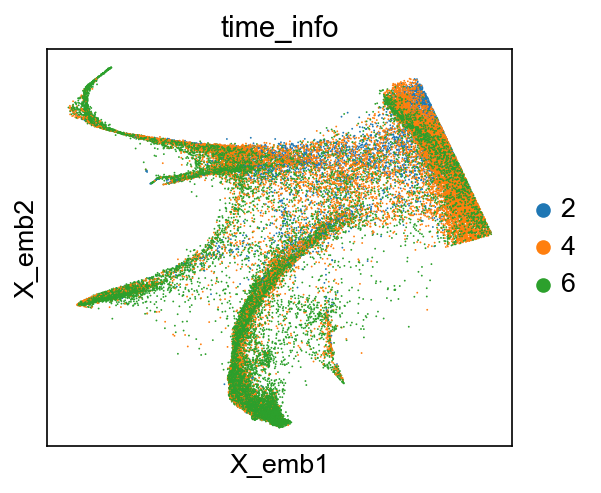

<Figure size 300x262.5 with 0 Axes>

In [53]:
cs.pl.embedding(adata_orig_1,color='time_info')

In [54]:
adata_orig_1

AnnData object with n_obs × n_vars = 38457 × 25289
    obs: 'n_counts', 'Time_Point', 'Source', 'Well', 'Cell_type', 'mito_frac', 'time_info', 'state_info'
    var: 'highly_variable'
    uns: 'AllCellCyc_genes', 'clonal_time_points', 'data_des', 'max_mito', 'min_tot', 'neighbors', 'new_highvar_genes', 'state_info_colors', 'time_ordering', 'umap', 'time_info_colors'
    obsm: 'Caleb_projection', 'X_clone', 'X_emb', 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

### Infer transition map from all clones

In [55]:
adata_3=cs.tmap.infer_Tmap_from_multitime_clones(adata_orig_1,later_time_point='6',smooth_array=[20,15,10],
        sparsity_threshold=0.1,intraclone_threshold=0.1,extend_Tmap_space=True)

------Compute the full Similarity matrix if necessary------


Trying to set attribute `.uns` of view, copying.


------Infer transition map between initial time points and the later time one------
--------Current initial time point: 2--------
Step 1: Select time points
Number of multi-time clones post selection: 355
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.969
--------Current initial time point: 4--------
Step 1: Select time points
Number of multi-time clones post selection: 1270
Step 2: Optimize the transition map recursively
Load pre-computed similarity matrix
Iteration 1, Use smooth_round=20
Iteration 2, Use smooth_round=15
Iteration 3, Use smooth_round=10
Convergence (CoSpar, iter_N=3): corr(previous_T, current_T)=0.985
-----------Total used time: 358.6776158809662 s ------------


### Fate bias

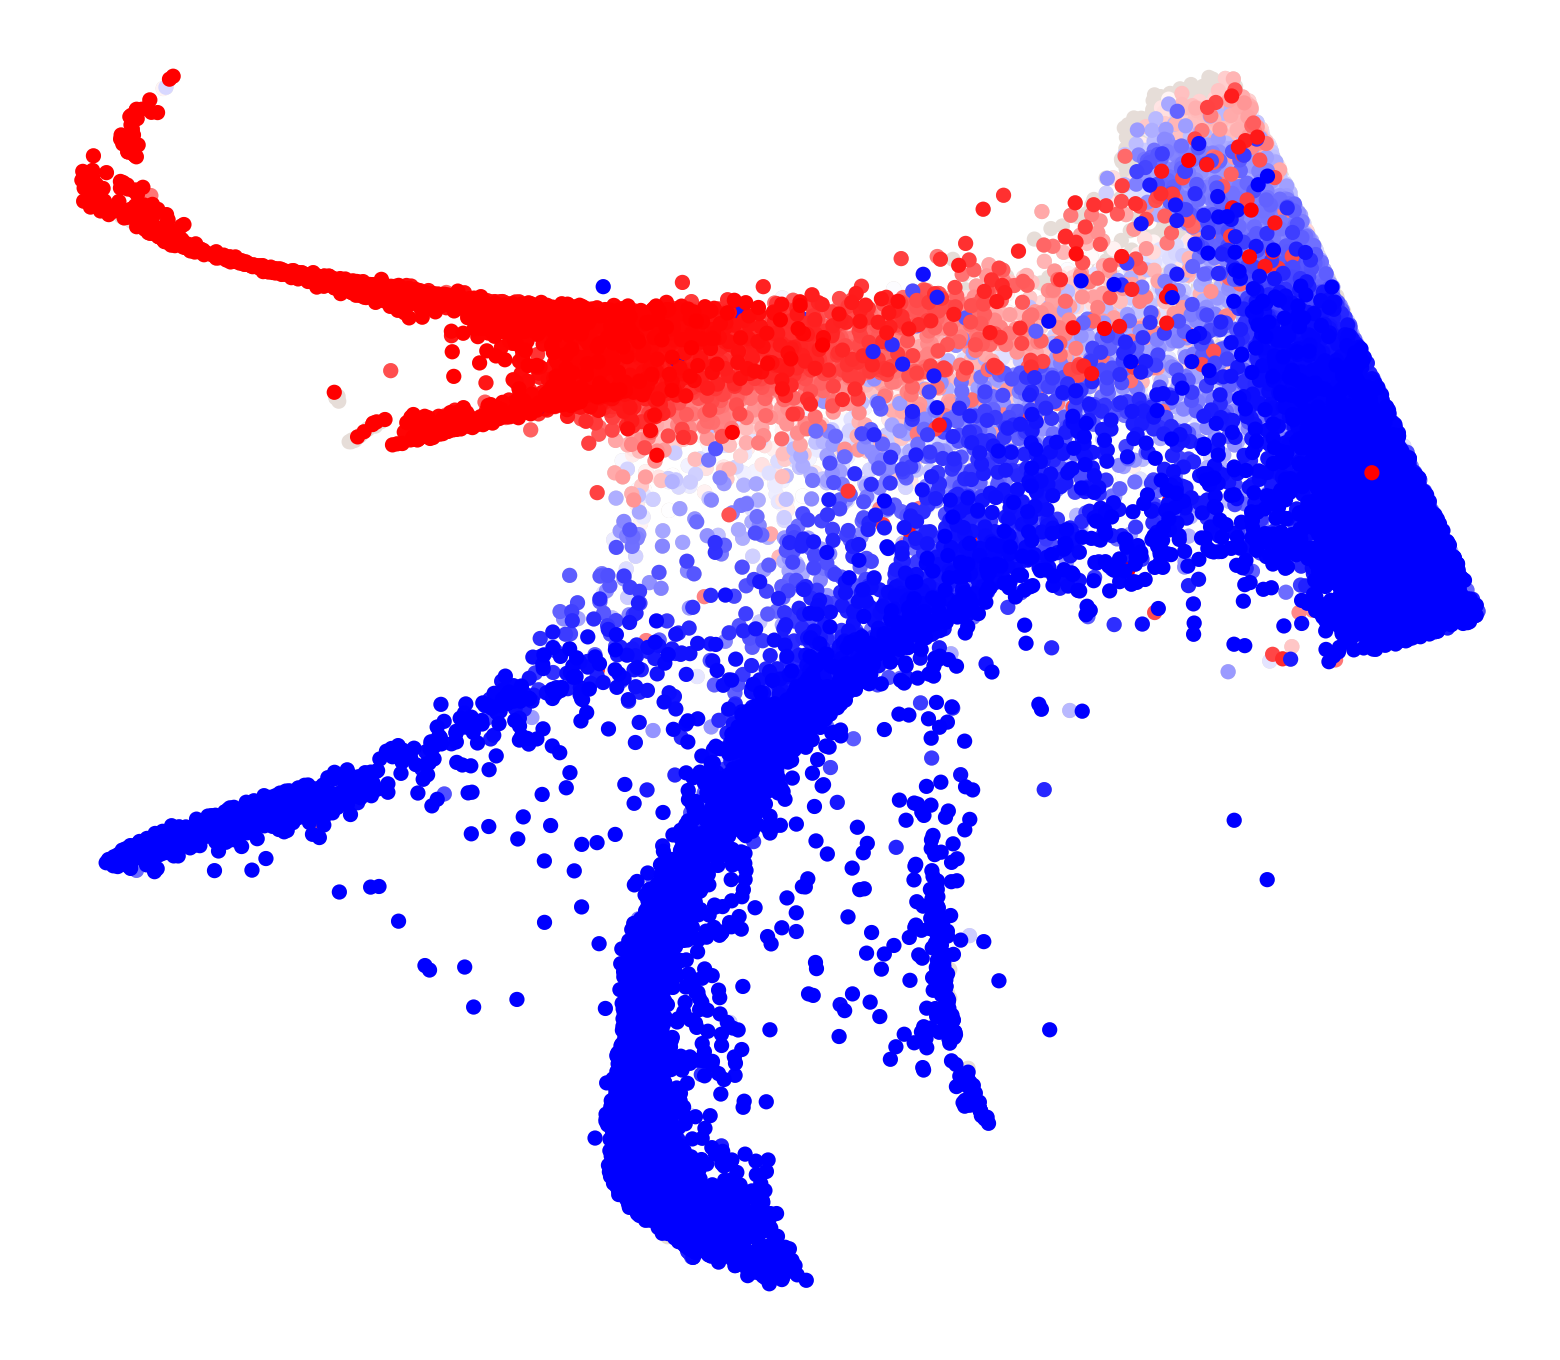

In [71]:
cs.pl.fate_bias(adata_3,selected_fates=[['Meg','Erythroid'],['Baso','Mast','Eos']],used_Tmap='transition_map',
            plot_target_state=False,map_backward=True,sum_fate_prob_thresh=0.05,
                       color_bar=False,method='norm-sum',show_histogram=False)

### Identify ancestor populations

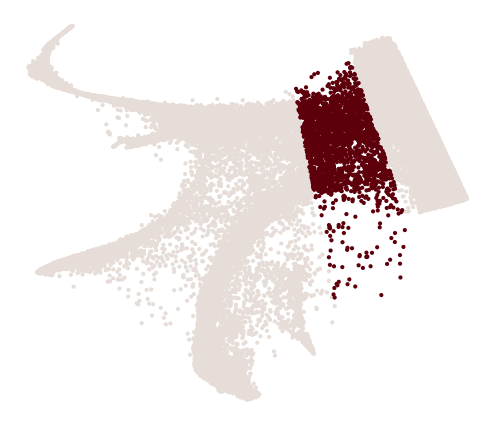

In [58]:
x_emb=adata_orig_1.obsm['X_emb'][:,0]
y_emb=adata_orig_1.obsm['X_emb'][:,1]

index_2=cs.hf.above_the_line(adata_orig_1.obsm['X_emb'],[0,-500],[-300,1000])
index_2_2=cs.hf.above_the_line(adata_orig_1.obsm['X_emb'],[-450,-600],[-600,800])

final_mask= (index_2_2) & (~index_2) #& index_3 & index_4 & index_5 #mask_1 &
cs.pl.customized_embedding(x_emb,y_emb,final_mask)

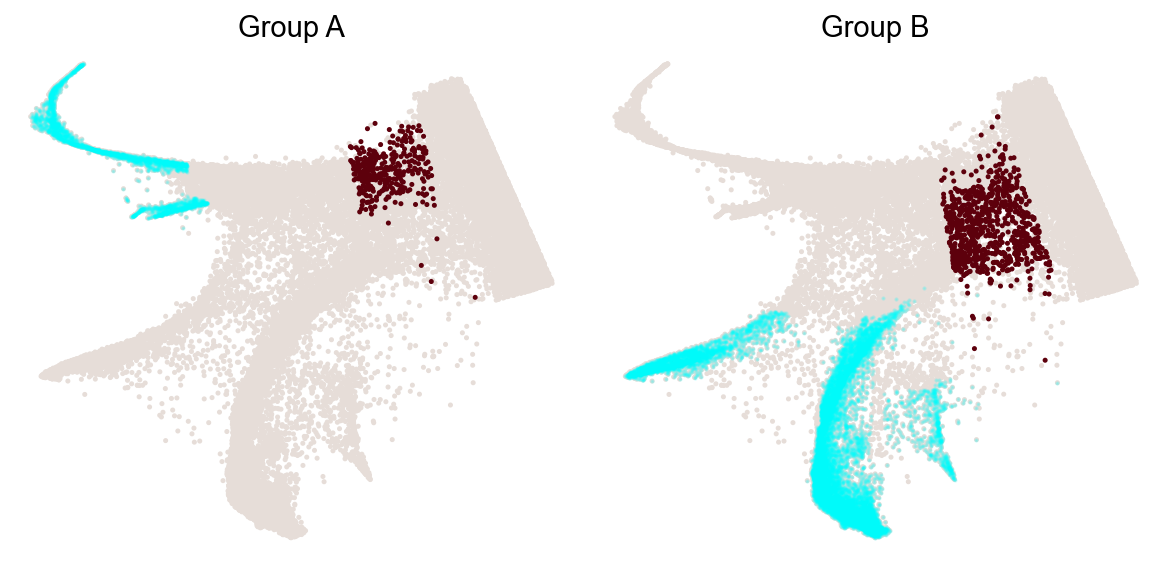

In [59]:
cs.pl.dynamic_trajectory_from_fate_bias(adata_3, selected_fates=[['Meg','Erythroid'],['Baso','Mast','Eos']], 
 used_Tmap='transition_map', map_backward=True, bias_threshold_A=0.6,bias_threshold_B=0.3, mask=final_mask,
                method='norm-sum',sum_fate_prob_thresh=0, avoid_target_states=True)

### DGE analysis

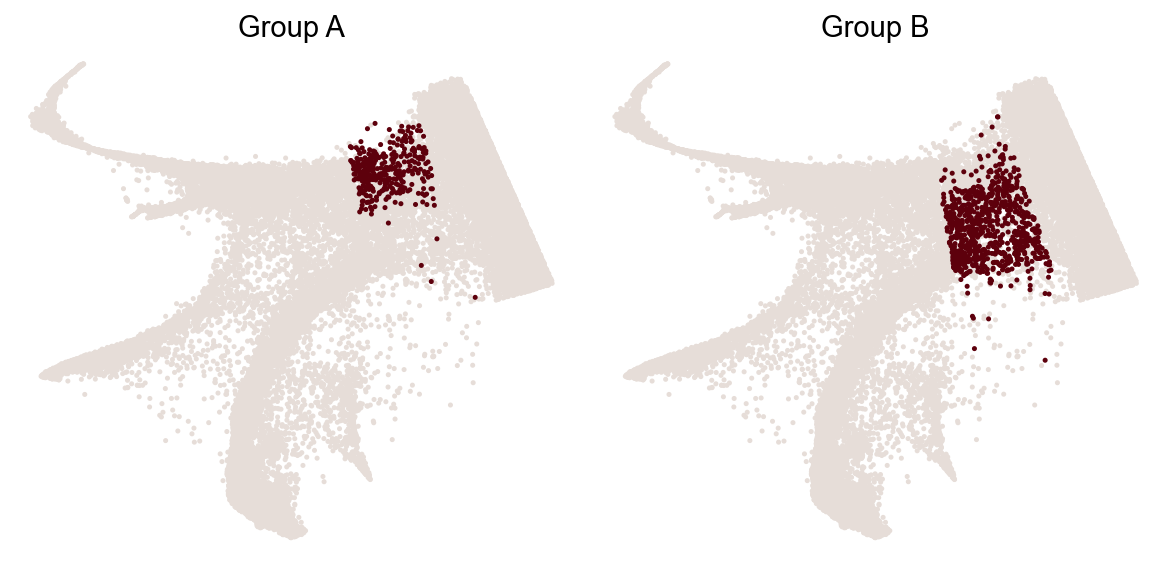

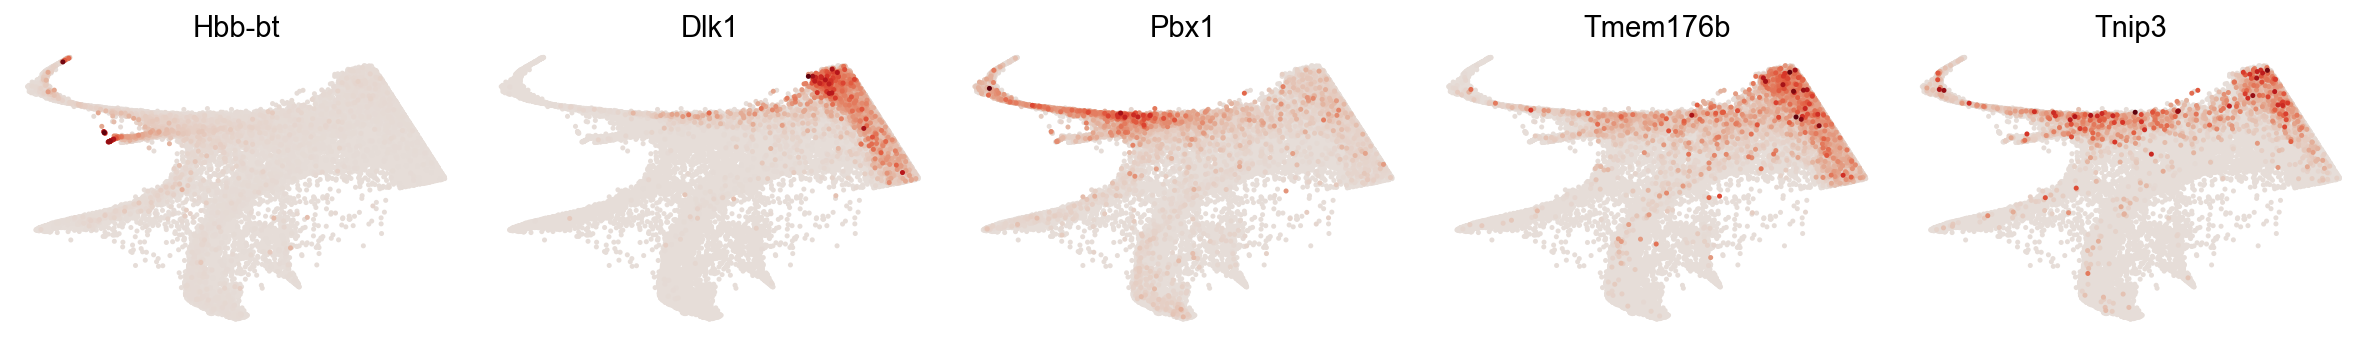

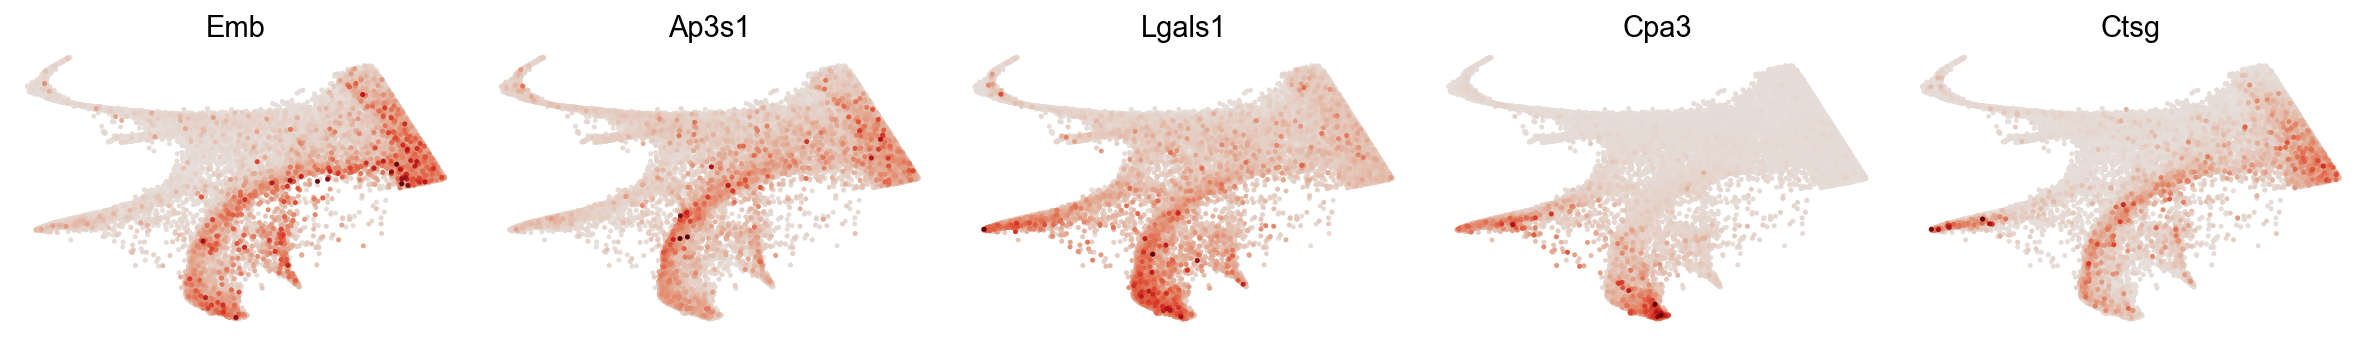

In [60]:
dge_gene_A, dge_gene_B=cs.pl.differential_genes(adata_3,plot_gene_N=5)

In [61]:
# All, ranked, DGE genes for group A
dge_gene_A

index      gene        Qvalue     mean_1     mean_2     ratio
0      28    Hbb-bt  2.325122e-12   1.084350   3.099235 -0.975757
1     192      Dlk1  1.888777e-03   0.362548   1.515336 -0.884444
2      18      Pbx1  3.260944e-16   0.123105   0.989597 -0.824983
3      21  Tmem176b  2.804040e-15   0.398115   1.341797 -0.744133
4      24     Tnip3  6.897902e-13   0.030880   0.721115 -0.739467
..    ...       ...           ...        ...        ...       ...
75    256     Rps19  1.020369e-02   6.227517   7.355206 -0.209175
76    114   mt-Atp6  8.440079e-05  41.971764  47.858364 -0.185217
77    152     Rpl23  5.600670e-04  16.664854  19.059944 -0.183436
78    230      Rpl7  5.590050e-03   8.353278   9.543811 -0.172852
79    359     Rpl19  4.459240e-02   4.011672   4.628918 -0.167566

[80 rows x 6 columns]

In [62]:
sub_predicted_upper=['Slc14a1','Plxnc1','Mef2c','Tnip3','Pbx1','Hbb-bt','Tmem176b','Car2','Pim2',  'Tsc22d1', 'Plcg2', 'Gmpr', 'Cd44', 'Irgm1', 
'Hsd17b10','Dlk1']
sub_predicted_lower=['Ctsg', 'Emb', 'Ccl9', 'Igfbp7', 'Ap3s1', 'Gstm1',  'Ms4a3', 'Fcgr3', 'Mpo', 
            'Cebpb','Thy1', 'Anxa3', 'Sell',  'Pcsk9','Fcgr2b','Cebpa','Cxcr4']

In [65]:
state_info=np.array(adata_3.obs['state_info'])
cell_group_A=adata_3.obs['cell_group_A']
state_info[cell_group_A]='MegEr_Prog'
cell_group_B=adata_3.obs['cell_group_B']
state_info[cell_group_B]='EMB_Prog'

In [66]:
adata_3.obs['state_info']=state_info

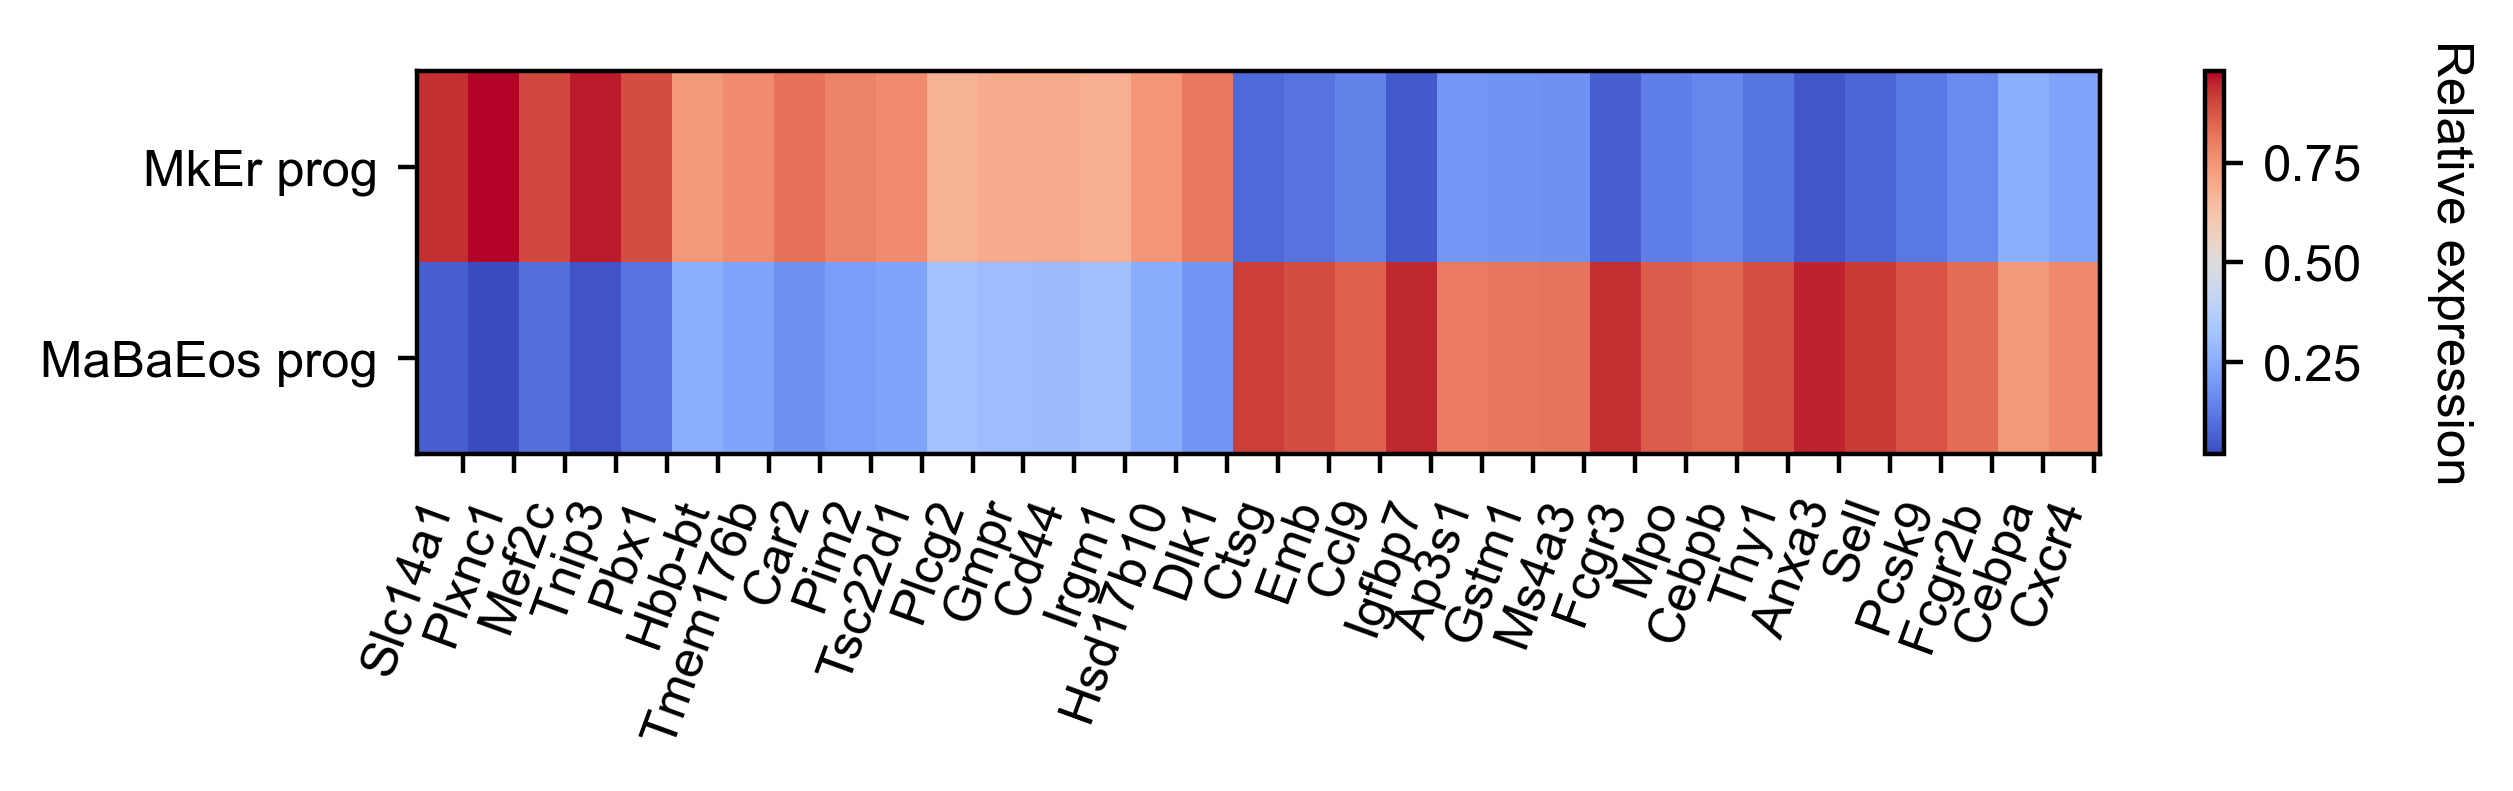

In [67]:
cs.settings.set_figure_params(format='pdf',figsize=[4,3.5],dpi=200,fontsize=10,pointsize=3) 

gene_list=sub_predicted_upper+sub_predicted_lower
selected_fates=['MegEr_Prog','EMB_Prog']
renames=['MkEr prog','MaBaEos prog']

gene_expression_matrix=cs.pl.gene_expression_heat_map(adata_3,selected_genes=gene_list,
            selected_fates=selected_fates,rename_fates=renames,horizontal=True,fig_width=6.5,fig_height=2)